# Obligatorio - Machine Learning

### Universidad ORT

#### Alumnos : Felipe Bastarrica (158687), Aldo Gioda (285961), Esteban Maestro (150882)

## Library Installation

In [5]:
#!pip install wandb
#!pip install gradio
#!pip install tensorflow-model-optimization
#!pip install seaborn
#!pip install azure-storage-blob azure-identity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.6/151.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.6 MB/s eta 0:00:00


#### Detele images from folders

In [1]:
# Clean folders

!rm images/train/1/*
!rm images/validation/1/*
!rm images/train/0/*
!rm images/validation/0/*

# Create folders
!mkdir images
!mkdir images/train
!mkdir images/validation

!mkdir images/train/0/
!mkdir images/validation/0/

!mkdir images/train/1/
!mkdir images/validation/1/


rm: cannot remove 'images/train/1/*': No such file or directory
rm: cannot remove 'images/validation/1/*': No such file or directory
rm: cannot remove 'images/train/0/*': No such file or directory
rm: cannot remove 'images/validation/0/*': No such file or directory


### Blob Connection and log parser

Se establece la conexión contra el Blob storage donde se encuentran las imágenes y el archivo resumen. Se parsea este archivo pero no se utiliza para el desarrollo del modelo.

In [1]:
import pandas as pd
import json
import numpy as np


from io import StringIO
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient

# Connection to Container
connection_string = "DefaultEndpointsProtocol=https;AccountName=cs210032001db9f06eb;AccountKey=Q7i41vK6zB2p/aKXulAdSROpoIou5uYj+EulJri7p9VI9VH4Us+Rlj+9fo5GC78TxSlPNQEWaDVY+AStDBpAfA==;EndpointSuffix=core.windows.net"
container_name = "container-ml"
blob_name = "properties_gallito.jl"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

blob_client = container_client.get_blob_client(blob_name)
csv_data = blob_client.download_blob().content_as_text()

# Replace commas for correct dataframe formation
csv_data2 = csv_data.replace(".jpg\",",".jpg\";").replace(", \"status\":","; \"status\":").replace(", {\"url\":", "; {\"url\":")

data = StringIO(csv_data2)
df = pd.read_csv(data, header=None, on_bad_lines='skip')

print(csv_data2)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
# Example of parsed images
df[7][0]

' "images": [{"url": "https://imagenes.gallito.com/1024x768/48931854.jpg"; "path": "full/0e040e8540402ac852cd676ef0fd88cb2f42c489.jpg"; "checksum": "36f868e1b1dfd5f8613ab70866eff078"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931855.jpg"; "path": "full/6b52d350a917976ba33dbbe3e92aa92abe0886c3.jpg"; "checksum": "fee765fbc56e992a8f6f55e42e184cfa"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931856.jpg"; "path": "full/0d98d020f7793c4f7446638a011aa5dd03197cd3.jpg"; "checksum": "738d5ef27711272f2571ee8eb4486e90"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931857.jpg"; "path": "full/2f8528d1b71540460d9237dcf1870412751d4093.jpg"; "checksum": "301cb3880553b5f3e60cec13e381d06e"; "status": "downloaded"}; {"url": "https://imagenes.gallito.com/1024x768/48931858.jpg"; "path": "full/690de228ed7bbff8edd02f01a2942202c08d0e06.jpg"; "checksum": "7ee08eddedb2864d5737239dc514fbfb"; "status": "downloaded"}; {"url":

In [8]:
# Dataframe from properties file
df.head()

,0,1,2,3,4,5,6,7
0,"{""id"": ""23811743""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-exce...","""link"": ""https://www.gallito.com.uy/venta-exc...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
1,"{""id"": ""23839777""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casona-en-...","""link"": ""https://www.gallito.com.uy/casona-en...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
2,"{""id"": ""20670463""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."
3,"{""id"": ""23062877""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/casa-en-ti...","""link"": ""https://www.gallito.com.uy/casa-en-t...","""property_type"": ""HOUSE""","""property_rooms"": ""3D""","""images"": [{""url"": ""https://imagenes.gallito...."
4,"{""id"": ""23250204""","""image_urls"": [""https://imagenes.gallito.com/...","""source"": ""gallito""","""url"": ""https://www.gallito.com.uy/venta-casa...","""link"": ""https://www.gallito.com.uy/venta-cas...","""property_type"": ""HOUSE""","""property_rooms"": ""+4D""","""images"": [{""url"": ""https://imagenes.gallito...."


### List of blobs

Se recorre el Blob Storage para obtener los nombres de las imágenes extraídas

In [3]:
# Function creates array of all blobs from container that contain .jpg in their name
def list_blobs_flat(blob_service_client: BlobServiceClient, container_name):
    container_client = blob_service_client.get_container_client(container=container_name)
    array = []
    blob_list = container_client.list_blobs()

    for blob in blob_list:
        if (".jpg" in blob.name):
            array.append(blob.name)
    return array

url_imagenes = list_blobs_flat(blob_service_client,"container-ml")

# Obtain labels from names
def get_labels(array_of_names):
    array = []

    for path in array_of_names:
        array.append(path.split("_")[2])
    return array

array_labels =  get_labels(url_imagenes)


#### Plot distribution of classes

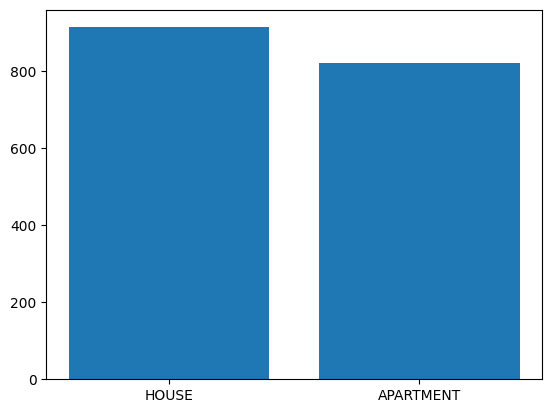

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = {"HOUSE":0, "APARTMENT":0}
for object in array_labels:
    count_classes[object] = count_classes[object] + 1

classes = list(count_classes.keys())
values = list(count_classes.values())

plt.bar(range(len(count_classes)), values, tick_label=classes)
plt.show()

### Save images in Notebook folders

In [11]:
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
import io
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import random

incr = 0
train_tabular_data = []
validation_tabular_data = []

for blobName in url_imagenes:
    incr += 1
    try:
        blob_service_client = BlobServiceClient.from_connection_string(conn_str=connection_string)
        blob_name = blobName
        blob_client = blob_service_client.get_blob_client(container_name, blob_name)

        stream = io.BytesIO()
        download_stream = blob_client.download_blob()

        stream.write(download_stream.readall())

        stream.seek(0)
        image = Image.open(stream)

        # Get information from URL
        id = (blobName.split("_")[0]).split("/")[1]
        tipo = blobName.split("_")[2]

        # Change traget to 0 and 1
        if (tipo == "HOUSE"):
            tipo = "0"
        else:
            tipo = "1"

        rooms = blobName.split("_")[3].split(".")[0]
        split_meters = blobName.split("_")[4]

        if "mts" in split_meters:
            meters = blobName.split("_")[4].split("mts")[0]
        # Special case of "has" instead of mts, if new class is detected print activates
        elif "has." in split_meters:
            meters = str(int(split_meters.split("has.")[0])*10000)
        else:
            print("New class of input")

        # Sort partitions 80-20 and load into folders
        if random.uniform(0, 1) > 0.2:
            image.save("images/train/"+tipo+"/"+id+"_"+str(incr)+".jpg")
            train_tabular_data.append((rooms,meters,tipo))
        else:
            image.save("images/validation/"+tipo+"/"+id+"_"+str(incr)+".jpg")
            validation_tabular_data.append((rooms,meters,tipo))

    except Exception as ex:
        print('Exception:')



#### Definitions

In [32]:
# Definitions
batch_size = 32
img_height = 180
img_width = 180
num_channels = 3
epochs = 10
steps_per_epoch = 30
validation_steps = 10
num_tabular_features = 2
class_names = ["HOUSE","APARTMENT"]
class_names_binary = ["0","1"]
headers = ["Cuartos","Meters","target"]


#### Save tabular data into CSVs

In [13]:
import csv

# Save tabular data into CSV file for saving data and analyze it after
train_tabular_data = np.array(train_tabular_data)
validation_tabular_data = np.array(validation_tabular_data)

def write_csv(CSV_name, array, headers_csv):
    with open(CSV_name, 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(headers_csv)
        for data in array:
            writer.writerow(data)

write_csv('csv_train.csv', train_tabular_data, headers)
write_csv('csv_validation.csv', validation_tabular_data, headers)

### Plot images

HOUSE


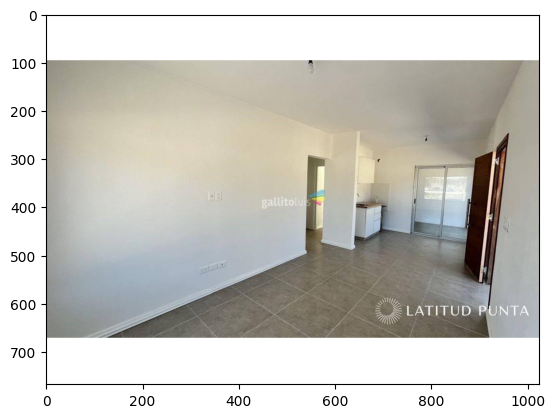

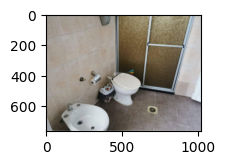

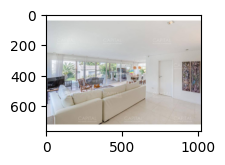

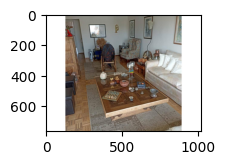

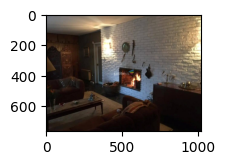

<Figure size 200x200 with 0 Axes>

APARTMENT


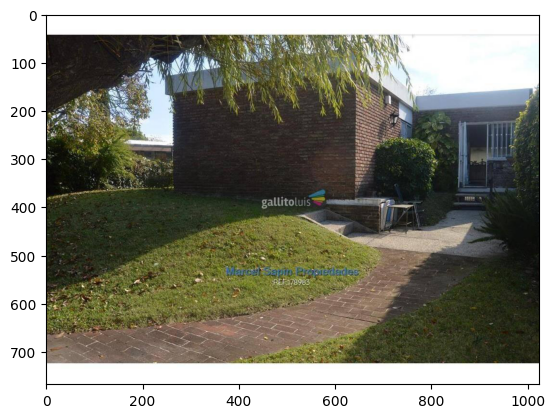

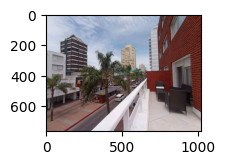

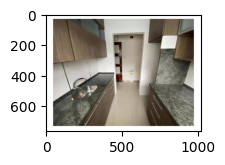

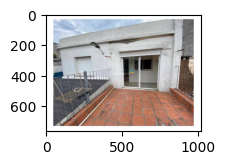

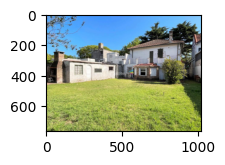

<Figure size 200x200 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
import glob, random
from tensorflow.keras.utils import load_img

for class_type in class_names_binary:
    print(class_names[int(class_type)])
    i = 0
    for i in range(5):
        images = glob.glob("images/train/"+str(class_names_binary)+"/*.jpg")
        random_image = random.choice(images)

        # load the image
        img = load_img(random_image)

        plt.imshow(img)
        plt.figure(figsize=(2,2))
        i += 1
    plt.show()

### Dataset Generation

##### Image dataset Generation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.05,
        height_shift_range=0.05,
        vertical_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'images/train',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'images/validation',
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='categorical')

Found 1411 images belonging to 2 classes.
Found 323 images belonging to 2 classes.


##### Tabular data processing

In [7]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV file
data_train = pd.read_csv('csv_train.csv')
data_validation = pd.read_csv('csv_validation.csv')

# Replace special characters from tabular data
data_train['Cuartos'] = data_train['Cuartos'].str.replace('D','')
data_train['Cuartos'] = data_train['Cuartos'].str.replace('\+4','5')

data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('D','')
data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('\+4','5')

# Split into features and target
X_train = data_train.drop('target', axis=1).astype(float).to_numpy()
y_train = data_train.iloc[:,-1].astype(float).to_numpy().reshape(-1, 1)
X_test = data_validation.drop('target', axis=1).astype(float).to_numpy()
y_test = data_validation.iloc[:,-1].astype(float).to_numpy().reshape(-1, 1)

<ipython-input-7-816952a9f5f4>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  data_train['Cuartos'] = data_train['Cuartos'].str.replace('\+4','5')
<ipython-input-7-816952a9f5f4>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  data_validation['Cuartos'] = data_validation['Cuartos'].str.replace('\+4','5')


#### Data tabular correlation

In [8]:
data_train.corr()

<ipython-input-8-e6bb2ed549f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_train.corr()


,Meters,target
Meters,1.000000,-0.058024
target,-0.058024,1.000000


#### Plot data distribution

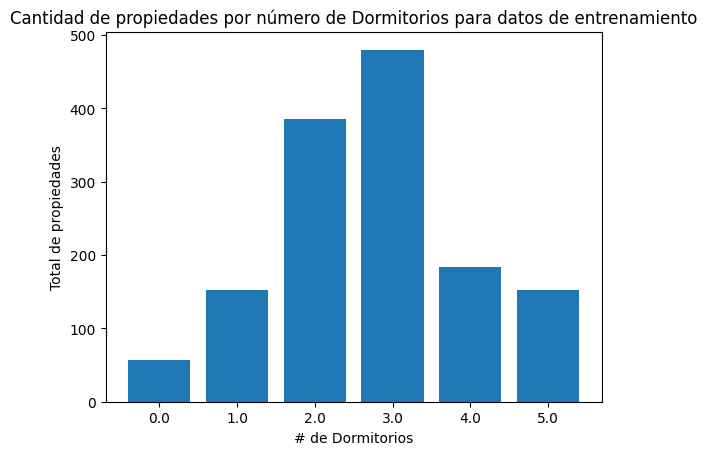

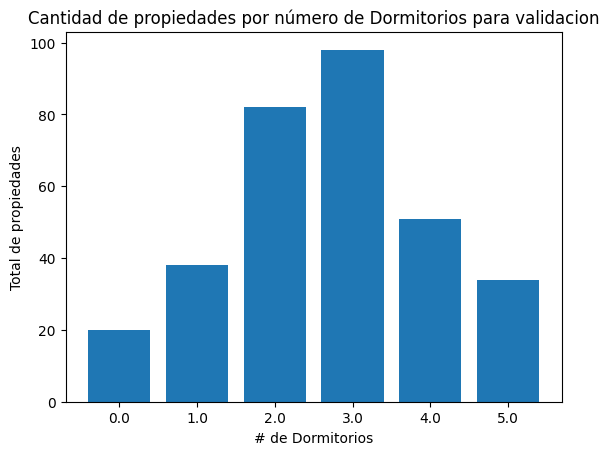

In [9]:
import numpy as np

def numpy_array_to_dict(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    result_dict = {value: count for value, count in zip(unique_values, counts)}
    return result_dict

# Example usage
dict_rooms_train = numpy_array_to_dict(X_train[:,0])
dict_rooms_val = numpy_array_to_dict(X_test[:,0])

plt.bar(range(len(dict_rooms_train)), list(dict_rooms_train.values()), tick_label=list(dict_rooms_train.keys()))
plt.title("Cantidad de propiedades por número de Dormitorios para datos de entrenamiento")
plt.xlabel("# de Dormitorios")
plt.ylabel("Total de propiedades")
plt.show()

plt.bar(range(len(dict_rooms_val)), list(dict_rooms_val.values()), tick_label=list(dict_rooms_val.keys()))
plt.title("Cantidad de propiedades por número de Dormitorios para validacion")
plt.xlabel("# de Dormitorios")
plt.ylabel("Total de propiedades")
plt.show()

In [35]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.25.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


<ipython-input-10-c625a65eb5a2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_array, bins=100)


<Axes: ylabel='Density'>

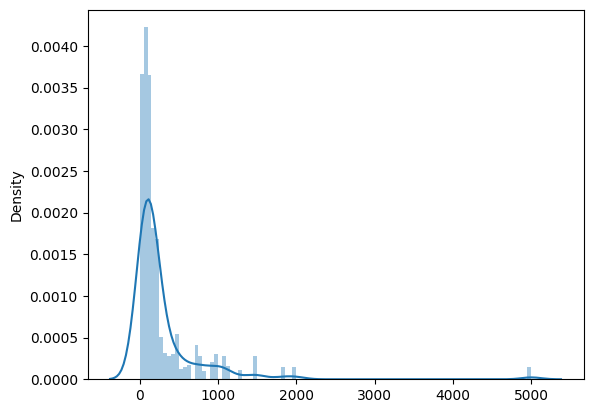

In [10]:
import seaborn as sns

#remove elements whose value is equal to max value
new_array = np.delete(X_train[:,1], np.where(X_train[:,1] == max(X_train[:,1])))
sns.distplot(new_array, bins=100)

/tmp/ipykernel_5181/3633044399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_array, bins=100)


<Axes: ylabel='Density'>

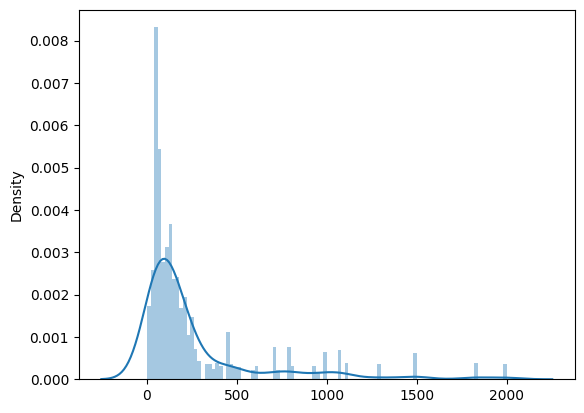

In [ ]:
# Remove "outliers"
new_array = np.delete(X_train[:,1], np.where(X_train[:,1] > 2000))
sns.distplot(new_array, bins=100)

In [11]:
# Concatenate batches of images
train_generator_concatenated=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
validation_generator_concatenated=np.concatenate([validation_generator.next()[0] for i in range(validation_generator.__len__())])

In [12]:
# Transform targets to categorical objects
y_train = tf.keras.utils.to_categorical(y_train, len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, len(class_names))

### Model Definition

Concatenación de 2 modelos, el primero para el procesamiento de imagenes utilizando Conv2D, MaxPooling2D y Flatten y el segundo para los datos tabulares. Ambas contienen layers de Batchnormalization y Dropout para mejorar el modelo a que no caiga en overfitting tan rápido y terminan concatenadas teniendo como salida un softmax sobre 2 outputs.

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Image data Processing Branch
image_input = Input(shape=(img_height, img_width, num_channels))
conv1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(image_input)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
batch1 = BatchNormalization()(pool1)
conv2 = Conv2D(128, kernel_size=(3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
batch2 = BatchNormalization()(pool2)
flatten = Flatten()(batch2)
drop1 = Dropout(rate = 0.4)(flatten)
image_features = Dense(128, activation='relu')(drop1)

# Tabular Data Processing Branch
tabular_input = Input(shape=(num_tabular_features,))
dense1 = Dense(128, activation='relu')(tabular_input)
drop2 = Dropout(rate = 0.4)(dense1)
tabular_features = Dense(64, activation='relu')(drop2)

# Fusion Layer
concatenated = Concatenate()([image_features, tabular_features])
drop3 = Dropout(rate = 0.4)(concatenated)
fusion_layer = Dense(192, activation='relu')(drop3)

# Output Layer
output = Dense(2, activation='softmax')(fusion_layer)

# Create the model
model = Model(inputs=[image_input, tabular_input], outputs=output)

model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 178, 178, 64  1792        ['input_19[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_18 (MaxPooling2D  (None, 89, 89, 64)  0           ['conv2d_18[0][0]']              
 )                                                                                          

### Model compilation

Ejecución del modelo para primeras pruebas, con el objetivo de poder llegar a obtener un modelo que pueda utilizar los datos de imágenes y los datos tabulares procesados previamente.

In [34]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Execution of model

history = model.fit(x=[train_generator_concatenated, X_train], y=y_train,
                        steps_per_epoch=steps_per_epoch,
                        epochs=epochs,
                        validation_data=([validation_generator_concatenated, X_test], y_test),
                        validation_steps = validation_steps)

Epoch 1/10
30/30 [==============================] - 237s 8s/step - loss: 4.1202 - accuracy: 0.6619 - val_loss: 0.9923 - val_accuracy: 0.7307
Epoch 2/10
30/30 [==============================] - 227s 8s/step - loss: 1.3885 - accuracy: 0.7186 - val_loss: 1.2100 - val_accuracy: 0.6718
Epoch 3/10
30/30 [==============================] - 228s 8s/step - loss: 0.9487 - accuracy: 0.7250 - val_loss: 1.1760 - val_accuracy: 0.6656
Epoch 4/10
30/30 [==============================] - 237s 8s/step - loss: 0.6189 - accuracy: 0.7888 - val_loss: 0.9090 - val_accuracy: 0.6625
Epoch 5/10
30/30 [==============================] - 221s 7s/step - loss: 0.5384 - accuracy: 0.8108 - val_loss: 0.7608 - val_accuracy: 0.7121
Epoch 6/10
30/30 [==============================] - 226s 8s/step - loss: 0.3933 - accuracy: 0.8561 - val_loss: 0.7217 - val_accuracy: 0.7028
Epoch 7/10
30/30 [==============================] - 226s 8s/step - loss: 0.3837 - accuracy: 0.8632 - val_loss: 0.5139 - val_accuracy: 0.7771
Epoch 8/10
30

## WANDB

In [13]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import wandb
from wandb.keras import WandbCallback

# Account Key
wandb.login(key="bb15b17a6eb09e20bb877cebbceb375ade025b37")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [25]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
from tensorflow_model_optimization.sparsity import keras as sparsity

model_history = []

# Launch 2 experiments, trying different dropout rates
for run in range(2):

    # Start a run, tracking hyperparameters
    run = wandb.init(
        project="ml-en-produccion",
        config={

            "activation_1": "relu",
            "img_height": 180,
            "img_width": 180,
            "dropout": random.uniform(0.20, 0.80),
            "optimizer": "adam",
            "loss": "categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 15,
            "batch_size": 32,
            "steps_per_epoch":30,
            "validation_steps":10,
            "initial_sparsity": 0.0,
            "final_sparsity": 0.5,
            "begin_step": 200,
            "end_step": 4000
        },
    )
    config = wandb.config


    # Define tu modelo

    image_input = Input(shape=(img_height, img_width, num_channels))
    conv1 = Conv2D(64, kernel_size=(3, 3), activation=config.activation_1)(image_input)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, kernel_size=(3, 3), activation=config.activation_1)(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    flatten = Flatten()(pool2)
    image_features = Dense(128, activation=config.activation_1)(flatten)

    # Tabular Data Processing Branch
    tabular_input = Input(shape=(num_tabular_features,))
    tabular_features = Dense(64, activation=config.activation_1)(tabular_input)

    # Fusion Layer
    concatenated = Concatenate()([image_features, tabular_features])
    fusion_layer = Dense(64, activation=config.activation_1)(concatenated)

    # Output layer
    output = Dense(2, activation='softmax')(fusion_layer)
    # Create the model
    model = Model(inputs=[image_input, tabular_input], outputs=output)
    # Compila y entrena el modelo
    model.compile(optimizer=config.optimizer, loss=config.loss,  metrics=[config.metric])

    # Early stopping TODO
    earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


    # Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints
    wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]
    '''
    # Fit without pruning
    history = model.fit(x=[train_generator_concatenated, X_train], y=y_train,
                        steps_per_epoch=config.steps_per_epoch,
                        epochs=config.epoch,
                        validation_data=([validation_generator_concatenated, X_test], y_test),
                        validation_steps = config.validation_steps,
                        callbacks=[wandb_callbacks,earlystopping_callback])
    '''

    # Addition of Pruning Parameters
    pruning_params = {
        'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=config.initial_sparsity,
                                                    final_sparsity=config.final_sparsity,
                                                    begin_step=config.begin_step,
                                                    end_step=config.end_step)
    }

    # Envolver el modelo con las capas de pruning. Esto agregará una operación de pruning a cada capa de nuestro modelo.
    model_for_pruning = sparsity.prune_low_magnitude(model, **pruning_params)

    # Necesitamos recompilar el modelo después de agregar las capas de pruning.
    model_for_pruning.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

    # Entrenar el modelo con callbacks para habilitar pruning.
    # El callback UpdatePruningStep asegurará que el estado del pruning se actualiza en cada paso de entrenamiento.
    pruning_callbacks = [
    sparsity.UpdatePruningStep(),
    ]

    history = model_for_pruning.fit(x=[train_generator_concatenated, X_train], y=y_train,
                        steps_per_epoch=config.steps_per_epoch,
                        epochs=config.epoch,
                        validation_data=([validation_generator_concatenated, X_test], y_test),
                        validation_steps = config.validation_steps,
                        callbacks=[wandb_callbacks,earlystopping_callback, pruning_callbacks])

    model_history.append(history)

    # Save the model to W&B
    best_model = wandb.Artifact(f"model_{run.id}", type='model')
    model_for_pruning.save('my_model.h5')
    best_model.add_file('my_model.h5')
    run.log_artifact(best_model)

    # Link the model to the Model Registry
    run.link_artifact(best_model, 'model-registry/My Registered Model')

    wandb.finish()

Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 7.0072 - accuracy: 0.7257

wandb: Adding directory to artifact (./my_model_01)... Done. 5.6s


30/30 [==============================] - 254s 8s/step - loss: 7.0072 - accuracy: 0.7257 - val_loss: 0.5766 - val_accuracy: 0.7245
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 0.7345 - accuracy: 0.7236

wandb: Adding directory to artifact (./my_model_02)... Done. 6.5s


30/30 [==============================] - 243s 8s/step - loss: 0.7345 - accuracy: 0.7236 - val_loss: 0.9429 - val_accuracy: 0.6780
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 0.6452 - accuracy: 0.7271

wandb: Adding directory to artifact (./my_model_03)... Done. 2.8s


30/30 [==============================] - 236s 8s/step - loss: 0.6452 - accuracy: 0.7271 - val_loss: 0.5126 - val_accuracy: 0.7926
Epoch 4/15
30/30 [==============================] - ETA: 0s - loss: 0.5482 - accuracy: 0.7548

wandb: Adding directory to artifact (./my_model_04)... Done. 6.1s


30/30 [==============================] - 245s 8s/step - loss: 0.5482 - accuracy: 0.7548 - val_loss: 0.5190 - val_accuracy: 0.7678
Epoch 5/15
30/30 [==============================] - ETA: 0s - loss: 0.4077 - accuracy: 0.8122

wandb: Adding directory to artifact (./my_model_05)... Done. 12.6s


30/30 [==============================] - 262s 9s/step - loss: 0.4077 - accuracy: 0.8122 - val_loss: 0.5835 - val_accuracy: 0.7585
Epoch 6/15
30/30 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.8370

wandb: Adding directory to artifact (./my_model_06)... Done. 5.9s


30/30 [==============================] - 250s 8s/step - loss: 0.3938 - accuracy: 0.8370 - val_loss: 0.6233 - val_accuracy: 0.7523
Epoch 7/15
30/30 [==============================] - ETA: 0s - loss: 0.2355 - accuracy: 0.8972

wandb: Adding directory to artifact (./my_model_07)... Done. 2.8s


30/30 [==============================] - 255s 9s/step - loss: 0.2355 - accuracy: 0.8972 - val_loss: 0.7333 - val_accuracy: 0.7430
Epoch 8/15
30/30 [==============================] - ETA: 0s - loss: 0.1727 - accuracy: 0.9341

wandb: Adding directory to artifact (./my_model_08)... Done. 5.8s


30/30 [==============================] - 239s 8s/step - loss: 0.1727 - accuracy: 0.9341 - val_loss: 0.7356 - val_accuracy: 0.7245
Epoch 9/15
30/30 [==============================] - ETA: 0s - loss: 0.0971 - accuracy: 0.9688

wandb: Adding directory to artifact (./my_model_09)... Done. 5.5s


30/30 [==============================] - 237s 8s/step - loss: 0.0971 - accuracy: 0.9688 - val_loss: 0.9348 - val_accuracy: 0.7245
Epoch 10/15
30/30 [==============================] - ETA: 0s - loss: 0.0549 - accuracy: 0.9872

wandb: Adding directory to artifact (./my_model_10)... Done. 6.1s


30/30 [==============================] - 258s 9s/step - loss: 0.0549 - accuracy: 0.9872 - val_loss: 1.0955 - val_accuracy: 0.7276
Epoch 11/15
30/30 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9936

wandb: Adding directory to artifact (./my_model_11)... Done. 5.9s


30/30 [==============================] - 251s 8s/step - loss: 0.0313 - accuracy: 0.9936 - val_loss: 1.4427 - val_accuracy: 0.6997
Epoch 12/15
30/30 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9979

wandb: Adding directory to artifact (./my_model_12)... Done. 9.9s


30/30 [==============================] - 248s 8s/step - loss: 0.0175 - accuracy: 0.9979 - val_loss: 1.6459 - val_accuracy: 0.7245
Epoch 13/15
30/30 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9993

wandb: Adding directory to artifact (./my_model_13)... Done. 10.5s


30/30 [==============================] - 252s 8s/step - loss: 0.0072 - accuracy: 0.9993 - val_loss: 1.6786 - val_accuracy: 0.7059
Epoch 14/15
30/30 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9993

wandb: Adding directory to artifact (./my_model_14)... Done. 5.8s


30/30 [==============================] - 251s 8s/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 1.8044 - val_accuracy: 0.7121
Epoch 15/15
30/30 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000

wandb: Adding directory to artifact (./my_model_15)... Done. 2.8s


30/30 [==============================] - 235s 8s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 1.9324 - val_accuracy: 0.7059


epoch/accuracy,▁▁▁▂▃▄▅▆▇██████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▄▁█▆▆▆▅▄▄▄▂▄▃▃▃
epoch/val_loss,▁▃▁▁▁▂▂▂▃▄▆▇▇▇█
epoch/accuracy,1.0
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.00277
epoch/val_accuracy,0.70588


Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 1.7106 - accuracy: 0.6825

wandb: Adding directory to artifact (./my_model_01)... Done. 13.4s


30/30 [==============================] - 260s 9s/step - loss: 1.7106 - accuracy: 0.6825 - val_loss: 0.4853 - val_accuracy: 0.7276
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 0.5065 - accuracy: 0.7576

wandb: Adding directory to artifact (./my_model_02)... Done. 5.8s


30/30 [==============================] - 236s 8s/step - loss: 0.5065 - accuracy: 0.7576 - val_loss: 0.4606 - val_accuracy: 0.7492
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 0.4453 - accuracy: 0.7902

wandb: Adding directory to artifact (./my_model_03)... Done. 7.0s


30/30 [==============================] - 244s 8s/step - loss: 0.4453 - accuracy: 0.7902 - val_loss: 0.4610 - val_accuracy: 0.7399
Epoch 4/15
30/30 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.8058

wandb: Adding directory to artifact (./my_model_04)... Done. 6.2s


30/30 [==============================] - 245s 8s/step - loss: 0.4264 - accuracy: 0.8058 - val_loss: 0.4687 - val_accuracy: 0.7307
Epoch 5/15
30/30 [==============================] - ETA: 0s - loss: 0.3768 - accuracy: 0.8271

wandb: Adding directory to artifact (./my_model_05)... Done. 10.5s


30/30 [==============================] - 241s 8s/step - loss: 0.3768 - accuracy: 0.8271 - val_loss: 0.4653 - val_accuracy: 0.7523
Epoch 6/15
30/30 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.8809

wandb: Adding directory to artifact (./my_model_06)... Done. 5.4s


30/30 [==============================] - 243s 8s/step - loss: 0.2818 - accuracy: 0.8809 - val_loss: 0.5959 - val_accuracy: 0.7492
Epoch 7/15
30/30 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9355

wandb: Adding directory to artifact (./my_model_07)... Done. 5.5s


30/30 [==============================] - 255s 8s/step - loss: 0.1813 - accuracy: 0.9355 - val_loss: 0.7325 - val_accuracy: 0.7121
Epoch 8/15
30/30 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.9646

wandb: Adding directory to artifact (./my_model_08)... Done. 5.7s


30/30 [==============================] - 239s 8s/step - loss: 0.1015 - accuracy: 0.9646 - val_loss: 0.9180 - val_accuracy: 0.7276
Epoch 9/15
30/30 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9887

wandb: Adding directory to artifact (./my_model_09)... Done. 5.7s


30/30 [==============================] - 237s 8s/step - loss: 0.0437 - accuracy: 0.9887 - val_loss: 1.2011 - val_accuracy: 0.7307
Epoch 10/15
30/30 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9950

wandb: Adding directory to artifact (./my_model_10)... Done. 5.5s


30/30 [==============================] - 258s 9s/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 1.3831 - val_accuracy: 0.7028
Epoch 11/15
30/30 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9965

wandb: Adding directory to artifact (./my_model_11)... Done. 4.2s


30/30 [==============================] - 238s 8s/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 1.7549 - val_accuracy: 0.7152
Epoch 12/15
30/30 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000

wandb: Adding directory to artifact (./my_model_12)... Done. 5.8s


30/30 [==============================] - 235s 8s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.8669 - val_accuracy: 0.7028
Epoch 13/15
30/30 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

wandb: Adding directory to artifact (./my_model_13)... Done. 6.2s


30/30 [==============================] - 240s 8s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.9528 - val_accuracy: 0.7183
Epoch 14/15
30/30 [==============================] - ETA: 0s - loss: 8.3481e-04 - accuracy: 1.0000

wandb: Adding directory to artifact (./my_model_14)... Done. 3.4s


30/30 [==============================] - 244s 8s/step - loss: 8.3481e-04 - accuracy: 1.0000 - val_loss: 2.0039 - val_accuracy: 0.7152
Epoch 15/15
30/30 [==============================] - ETA: 0s - loss: 5.7433e-04 - accuracy: 1.0000

wandb: Adding directory to artifact (./my_model_15)... Done. 6.0s


30/30 [==============================] - 239s 8s/step - loss: 5.7433e-04 - accuracy: 1.0000 - val_loss: 2.0660 - val_accuracy: 0.7152


epoch/accuracy,▁▃▃▄▄▅▇▇███████
epoch/epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▃▃▃▂▂▁▁▁▁▁▁▁▁
epoch/val_accuracy,▅█▆▅██▂▅▅▁▃▁▃▃▃
epoch/val_loss,▁▁▁▁▁▂▂▃▄▅▇▇███
epoch/accuracy,1.0
epoch/epoch,14
epoch/learning_rate,0.001
epoch/loss,0.00057
epoch/val_accuracy,0.71517


In [22]:
model_history

### Plot metrics

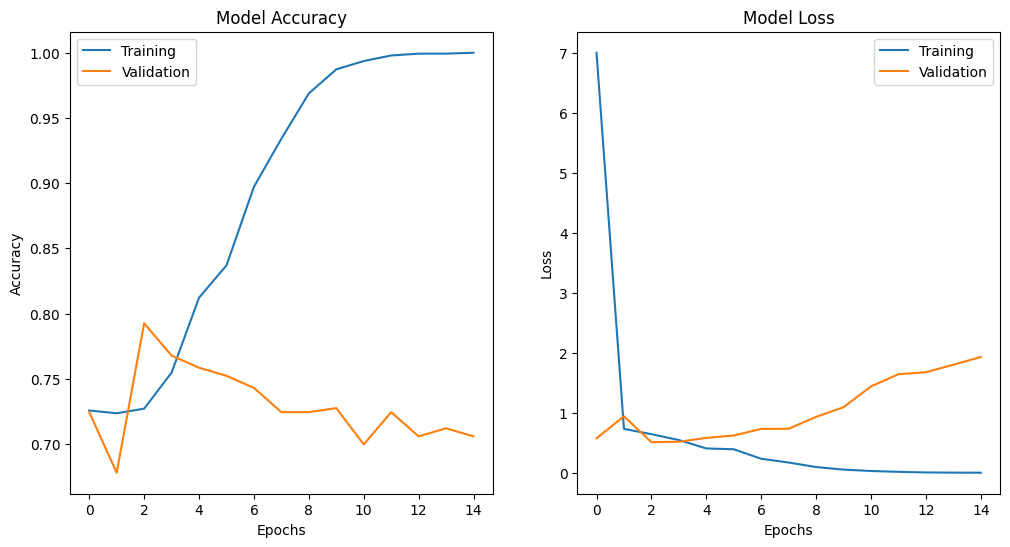

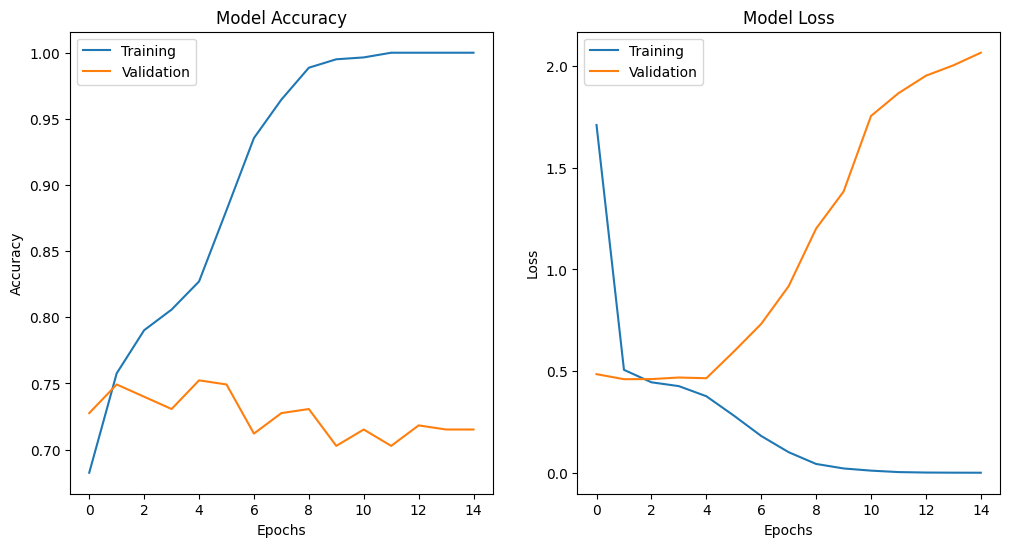

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_history(history):
    history_df = pd.DataFrame(history.history)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history_df['accuracy'], label='Training')
    plt.plot(history_df['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_df['loss'], label='Training')
    plt.plot(history_df['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('training_validation_plots.png')
    plt.show()

# Call the plotting function to display the graphs
for runs in model_history:
  plot_history(runs)

# Save the trained model
#model_for_pruning.save('conv_model.h5')
model.save('conv_model.h5')

#### Single object prediction

In [ ]:
# For testing, convert image to tensor and add dimension in first position
def input_conversion (image, tabular):
    tensor_img = tf.convert_to_tensor(image)
    tensor_tab = tf.convert_to_tensor(tabular)
    tensor_img = tf.expand_dims(tensor_img, 0)
    tensor_tab = tf.expand_dims(tensor_tab, 0)
    return tensor_img,tensor_tab

tensor_img, tensor_tab = input_conversion (validation_generator_concatenated[2], X_test[2])


In [ ]:
# Make a simple prediction
prediction = model.predict((tensor_img,tensor_tab))
print (prediction)

1/1 [==============================] - 0s 140ms/step
[[0.36130413 0.6386959 ]]


### Gradio

In [36]:
import numpy as np

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('conv_model.h5')

def classify_image(image, rooms, meters):
    image = np.expand_dims(image, axis=0)
    tabular = np.expand_dims([rooms,meters], axis=0).astype(float)
    prediction = model.predict([image,tabular])

    # Obtiene las etiquetas de las clases
    # Devuelve un diccionario con las etiquetas de las clases y sus probabilidades correspondientes
    return {class_names[i]: float(prediction[0][i]) for i in range(len(class_names))}


In [ ]:
import gradio as gr

iface = gr.Interface(
    fn=classify_image,  # Classification Function
    inputs=[gr.inputs.Image(shape=(img_height, img_width)), gr.inputs.Slider(0,5,label="Dormitorios", step=1), gr.inputs.Slider(0,5000,label="M2")], # Inputs
    outputs=gr.outputs.Label(num_top_classes=len(class_names)),  # Output
)
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cc3b093eb8de16c420.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
